In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def page_rank(G, alpha=0.5, max_iter=200):
    """Return the PageRank of the nodes in the graph. 

    :param dict G: the graph
    :param float d: the damping factor
    :param int max_iter: max number of iterations
    """
    d = alpha
    nodes = G.nodes()
    matrix = nx.adjacency_matrix(G, nodelist=nodes)
    out_degree = matrix.sum(axis=0)
    weight = matrix / out_degree
    N = G.number_of_nodes()
    pr = np.ones(N).reshape(N, 1) * 1./N

    for it in range(max_iter):
        old_pr = pr[:]
        pr = d * weight.dot(pr) + (1-d)/N
        
    return list(pr)

In [3]:
def page_rank_custom(G, alpha=0.5, max_iter=200):
    N = G.number_of_nodes()  # N 지정
    pr = np.ones(N) / N  # pr 벡터 지정, 1/N 으로 초기화
    out = np.array([G.out_degree(i) for i in range(N)])  # out degree 벡터 지정
    
    for _ in range(max_iter):
        tmp = np.zeros(N)
        for j in range(N):
            in_edges = G.in_edges(j) # j 노드를 가리키는 edge들
            summation = sum(pr[k] / out[k] for k, _ in in_edges if out[k] > 0) # out degree가 0인 경우 제외
            tmp[j] = alpha * summation + (1 - alpha) / N
        
        pr = tmp  # pr 업데이트

    return {i : float for i, float in enumerate(pr)}


In [4]:
# 예제 1.

g = nx.Graph().to_directed()
g.add_nodes_from([0,1,2])
g.add_edges_from([(0,1),(1,0),(1,2),(2,0)])

print("custom page rank :",page_rank_custom(g, 0.85, 100),"\n")
print("example page rank :",page_rank(g, 0.85, 100),"\n")
print("networkx page rank :",nx.pagerank(g,alpha=0.85,max_iter=100),"\n")
print()

# 예제 2.

g = nx.Graph().to_directed()
g.add_nodes_from([0,1,2,3,4])
g.add_edges_from([(0,1),(1,0),(1,2),(2,0),(0,3),(2,4),(4,0),(3,4),(3,1)])

print("custom page rank :",page_rank_custom(g, 0.85, 100),"\n")
print("example page rank :",page_rank(g,alpha=0.85,max_iter=100),"\n")
print("networkx page rank :",nx.pagerank(g,alpha=0.85,max_iter=100),"\n")

custom page rank : {0: 0.39739966082532496, 1: 0.3877897117015262, 2: 0.21481062747314866} 



C:\Users\김수영\AppData\Local\Temp\ipykernel_31460\571651538.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = nx.adjacency_matrix(G, nodelist=nodes)


example page rank : [matrix([[0.38778971]]), matrix([[0.39739966]]), matrix([[0.21481063]])] 

networkx page rank : {0: 0.3974000441421556, 1: 0.387789442707259, 2: 0.21481051315058508} 


custom page rank : {0: 0.31646606596814647, 1: 0.23440976120195872, 2: 0.12962414851083245, 3: 0.16449807803646224, 4: 0.15500194628260025} 

example page rank : [matrix([[0.29254948]]), matrix([[0.24962584]]), matrix([[0.16086685]]), matrix([[0.18406882]]), matrix([[0.11288902]])] 

networkx page rank : {0: 0.316465726874215, 1: 0.23441006941993475, 2: 0.1296240881605723, 3: 0.16449816005405948, 4: 0.1550019554912185} 



C:\Users\김수영\AppData\Local\Temp\ipykernel_31460\571651538.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = nx.adjacency_matrix(G, nodelist=nodes)


custom page rank : {0: 0.09699728538829488, 1: 0.05287692406114576, 2: 0.05707850948846201, 3: 0.0358598577864114, 4: 0.02197795236458959, 5: 0.029111154678370225, 6: 0.029111154678370225, 7: 0.0244904970352824, 8: 0.029766056081016946, 9: 0.014309397129032904, 10: 0.02197795236458959, 11: 0.009564745492135523, 12: 0.014644892011877141, 13: 0.029536456151913682, 14: 0.014535993997921236, 15: 0.014535993997921236, 16: 0.01678400544418971, 17: 0.014558677209021511, 18: 0.014535993997921236, 19: 0.01960463632565279, 20: 0.014535993997921236, 21: 0.014558677209021511, 22: 0.014535993997921236, 23: 0.03152251477667799, 24: 0.02107603355922279, 25: 0.021006197394492974, 26: 0.015044038082725534, 27: 0.02563976748284795, 28: 0.01957345946382848, 29: 0.026288537695114838, 30: 0.024590155248580107, 31: 0.037158087069145265, 32: 0.0716932260057544, 33: 0.10091918233262566} 

example page rank : [matrix([[0.09699729]]), matrix([[0.05287692]]), matrix([[0.05707851]]), matrix([[0.03585986]]), matri

C:\Users\김수영\AppData\Local\Temp\ipykernel_31460\571651538.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = nx.adjacency_matrix(G, nodelist=nodes)


Text(0.5, 0.98, '  Page Rank')

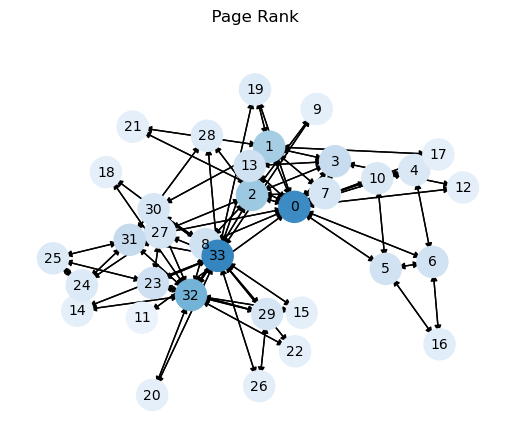

In [5]:
G = nx.karate_club_graph().to_directed()
pos = nx.spring_layout(G, k=1.1, seed=1234)
f, ax = plt.subplots()

for x, y in G.edges:

    G[x][y]["weight"] = 1 # graph를 unweighted 하게 바꿈

pr = page_rank(G, alpha=0.85, max_iter=100)
pr1 = page_rank_custom(G, alpha=0.85, max_iter=100)

print("custom page rank :",pr1,"\n")
print("example page rank :",pr,"\n")
print("networkx page rank :",nx.pagerank(G, 0.85, max_iter=100),"\n")

plt_nodes = nx.draw_networkx_nodes(
    G, pos,
    ax=ax,
    nodelist=G.nodes(),
    node_color=pr,
    alpha=1,
    node_size=500,
    cmap=plt.cm.Blues,
    vmin=0,
    vmax=0.15
)
ax.axis("off")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
f.suptitle(f"  Page Rank")